In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier       #to build classification tree
from sklearn.tree import plot_tree                    #to draw a classification tree
from sklearn.model_selection import train_test_split  #to split into training and testing sets
from sklearn.model_selection import cross_val_score   #for cross validation
from sklearn.metrics import confusion_matrix          #to create confusion matrix
from sklearn.metrics import plot_confusion_matrix     #to draw confusion matrix

# Loading the data

In [2]:
df = pd.read_csv('processed.cleveland.data', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# change the column number to column name

df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd'] 

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Missing data part 1: Identiying missing data

In [6]:
# dtypestells us the "data types " for each column
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [7]:
#print out unique values in the column called 'ca'
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [8]:
# print out unique values in column called 'thal'
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

# Missing data part 2: Dealing with missing data

Since scikit-learn's classification trees do not support datasets with missing values. We ca either delete these patients from 
the training datasets , or impute values for the missing data. First let's see how many rows contain missing values.

In [9]:
#print the numbers of rows that contain missing values.
# loc[], short for location , lets's us specify which rows we want and so we want any row with ? in column 'ca'or any row with 
# '?' in column 'thal'
# len(), short for length  prints out the numbers of rows.

len(df.loc[(df['ca'] == '?')
           |
          (df['thal'] == '?')])

6

only 6 rows have missing values.

In [10]:
# print out the rows that contain missing values.
df.loc[(df['ca'] == '?')
      |
      (df['thal']== '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


let's count the numbers of rows in the full dataset.

In [11]:
len(df)

303

So 6 of the 303 rows, or 2% contain missing value. Since 303 - 6= 297 is plenty of data to build a classification tree, we will 
remove the rows with missing values, rather than try to impute their values.

We will remove the rows with missinfg values by selecting all of the rows that do not contain question marks in either the ca
or thal columns:

In [12]:
#using loc[] to select all rows that do not contain missing values and save them in the new dataframe called 'df_no_missing'

df_no_missing = df.loc[(df['ca'] != '?')
                         &
                      (df['thal'] != '?')]

Since df_no_missing has 6 fewer rows than the original df, it should contain 297 rows.

In [13]:
len(df_no_missing)

297

We can make sure 'ca' and 'thal no longer contains ? marks by printing its unique values:'

In [14]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [15]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

We have verfied that df_no_missing does not contain any missing values.

# Formate Data Part 1: Split the data into Dependent and independent Variables

In [17]:
# Makeing a new copy of the columns used to make predictions
X = df_no_missing.drop('hd', axis=1).copy()
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [18]:
#Make a new copy of the column of data we want to predict
y= df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

# Format the Data Part 2: One-Hot-Encoding

Now that we have split the dataframe into two pieces, X, which contains the dat we will use to predict classifications, and y, 
which contains the  known classification in our training dataset, we need to take a closer look at the variables in X.  

Now just to review let's look at data types in X .

In [19]:
X.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
dtype: object

So we see that age, restbp, chol and thalach are all float64, which is good, because we want them to be floating point numbers.
All of the other columns, however need to be inspected to make sure they only contain resonable values , and some of them need 
to change. This is because while scikit learn Decision Tree natively support continuous data,like resting blood pressure(restbp)
and maximun heart rate(thalach), they do not natively support categorical data, like chest pain(cp), which contains 4 different
categories. Thus , in order to use categorical data with scikit learn Decision Tree, we have to use a trick that converts a 
column of categorical dta into multiple columns of binary values. This trick is called One-Hot-Encoding.

At this point you may be wonderring , what's wrong with trating categorical data like continuous data ? To answer that question 
let's look at an example: For the cp column, we have 4 option:
1.typical angina
2.atypical angina
3.non-anginal pain
4.asymptomatic

If we treated these values , 1,2,3,and 4, like continuous data, then we would assume that 4, which means 'asymptomatic', is more 
similar to 3, which means 'non-anginal pain', than it is to 1 or 2, which are other types of chest pain. That means the decision 
tree would be more likely to cluster the patients with 4s and 3s together that the patients with 4s and 1s together. In contrast
,if we treat these data as categorical data, then we treat each one as a seperate category that is no more or less similar to 
any of the other categories. Thus, the likelihood of clustering patients with 4s with 3s is the same as clustering 4s with 1s
, and that approach is more reasonab;e.

Now let's inspect and if needed convert the columns that contains categorical and integer data into a correct datatypes.
We will start with cp by inspecting all of its unique values.

In [20]:
X['cp'].unique()

array([1., 4., 3., 2.])

So good news is that cp only contains the values it is supposed to contain, so we will convert it, using One-Hot-Encoding, into
a series of column that only contains 0s and 1s.

Note: There are many ways to do One-Hot-Encoding in python. Two of the most popular methods are ColumnTransformer() (from scikit-learn)
 and get_dummies() (from pandas), and both methods have pros and cons. 

First, before we commit to converting cp with One-Hot-Encoding. lets see what happens when we convert cp without saving the 
results. This will make it easy to see how get_dummies() works.


In [21]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


it split cp into 4 columns, just like we expected it cp_1.0 is 1for any patient that scored a 1 for the chest pain and 0 for
all other patients. similarly for other cp columns.

Now that we see how get_dummies() works, let's use it on the four categoricalcolumns that have more than 2 categories and save 
the result.

In [22]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])

X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


We are do formatting the data for the classification tree.

Now , one last things before we build a classification Tree y doesn't contain 0s and 1s, instead it has 5 different levels of
heart disease. We can see this with unique()

In [23]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In this project we are only making a tree does simple classification and only care if someone has heart disease or not, so we need
to convert all numbers > 0 to 1.

In [24]:
y_not_zero_index = y > 0  # get the index for each non-zero value in y
y[y_not_zero_index] = 1  #set each non-zero value in y to 1

# verify that y omly contains 0 and 1
y.unique()

array([0, 1], dtype=int64)

# Build a Preliminary Classification Tree

In [25]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

#create a decision tree and fit it to the training data

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

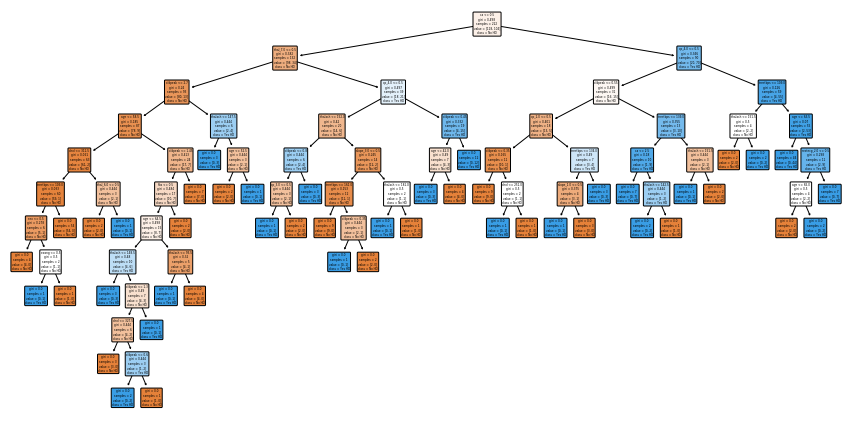

In [27]:
#Note: we can plot the tree and it is huge.

plt.figure(figsize=(15, 7.5))            #if we give semi colon then it will print only decision tree 
plot_tree(clf_dt, filled=True, rounded=True, class_names=["No HD", "Yes HD"], feature_names=X_encoded.columns);

Ok, we have built a classification tree for classification . lets see how its performs on the Testing dataset by running the
testing dataset down the tree and drawing a confusion matrix.






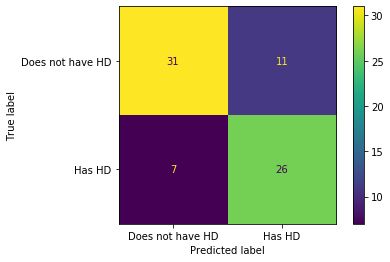

In [28]:
#Plot_confusion_matrix() will run the test data down the tree and draw a confusion matrix.

plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

In the confusion matrix , we see that of the 31+11=42 people that did not have Heart disease 31(74%)were correctly classified.
And of the 7+26=33 people that have heart disease, 26(79%) were correctly classified. Can we do better ? One thing that might 
be holding this classification tree back is that it may have overfit the training datasets. So let's prune the tree, Pruning in 
theory should solve the overfitting problem and give us better results. 

# Cost Complexity Pruning Part 1: Visualize alpha

Pruning a tree with cost complexity pruning can simplfy the whole process of finding a smaller tree that improves the accuracy 
with the Testing Dataset.

Purning a decision tree is all about finding the right value for the pruning parameter`, alpha, which controls how little or how
much pruning happens. One way to find the optimal value for alpha is to plot the accuracy of the tree as a function of different
values. We will do this for both the training dataset and the testing dataset.

First lets extract the different values of alpha that are available for this tree and build a pruned tree for each value for alpha.
Note: We omit the maximum value for alpha with ccp_alphas = ccp_alphas[:-1] because it would prune all leaves, leaving us with 
    only a root instead of a tree.

In [29]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)  # determine values for alpha
ccp_alphas = path.ccp_alphas  # extract different values for alpha
ccp_alphas = ccp_alphas[:-1]  # exclude the maximum value for alpha

clf_dts = []  # create an array that we will put decision tree into

#Now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha= ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

Now lets graph the accuracy of the trees using the Training Dataset and the testing datasets as a function of alpha.

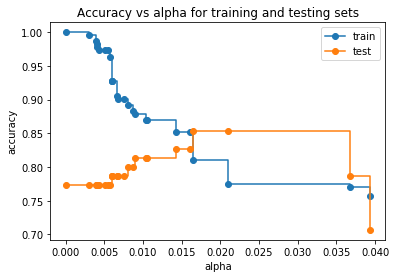

In [32]:
train_scores =[clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores =[clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax =plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle ="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle ="steps-post")
ax.legend()
plt.show()

In the graph above , we see that the accuracy for the testing dataset hits its maximum value of alpha is about 0.016.After this 
value for alpha, the accuracy of the training dataset drops off and that suggests we should set ccp_alpha=0.016.

Note: when we apply Cost Complexity Pruning to classification Tree, values for alpha go from 0 to 1, because GINI scores go from 
    0 to 1. In contrast, values for alpha for a Regression Tree can be much larger since the sum of squared residuals can ,
    in theory, go from 0 to positive infity.
    

# Cost Complexity Pruning Part 2: Cross Validation for finding the best Alpha

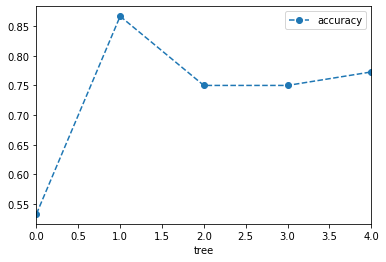

In [35]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016) #create the tree with ccp_alpha=0.016

#Now use 5 fold cross validation creates 5 different training and testing datasets that are then used to train and test the tree.

# Note: We use 5-fold because we don't have tons of data..

scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')



The graph above shows that using different Training and Testing data with the same alpha resulted in different accuracies,

suggesting that alpha is sensitive to the datasets. So, instead of picking a single Training dataset, lets use cross

validation to find the optimal value for ccp_alpha

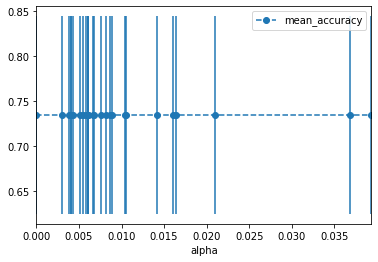

In [36]:
#create an array to store the results of each fold during cross validation
alpha_loop_values =[]

#For each candidate value for alpha , we will run 5-fold cross validation.
#Then we will store the mean and standard deviation of the scores (the accuracy) for each call to cross_val_score in alpha_loop_values..
for ccp_alpha in ccp_alphas:
    cld_dt = DecisionTreeClassifier(random_state=0, ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
#Now we can draw a graph of the means and standard deviations of the scores for each candidate value for alpha

alpha_results =pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')

Using cross validation , we can see that overall , instead of setting ccp_alpha=0.016, we need to set it to something closer
to 0.014. We can find the exact vaue with:

In [43]:
alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.734545,0.109433


Now lets store the ideal value for alpha so that we can use it to build the best tree.

In [46]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]['alpha']

ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

NOte: IN this point Python thinks ideal_ccp_alpha is a series , which is a type of array. We can tell because when we printed
ideal_ccp_alpha out, we got two bits of stuff. the first one was 20, which is the index of he series, the second one, 0.014225,
is the value we want . So we can convert this  from a series to a float with following command:





In [47]:
# convert ideal_ccp_alpha from a series to float
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

# Building , Evaluating, Drawing and Interpreting the Final Classification Tree

Now that we have the ideal value for alpha we can build the final classification Tree by setting ccp_alpha=ideal_ccp_alpha:

In [48]:
# Build and train a new decision tree , only this time use optimal value for alpha

clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

Now lets draw another cofusion matrix to see if the pruned tree does better.

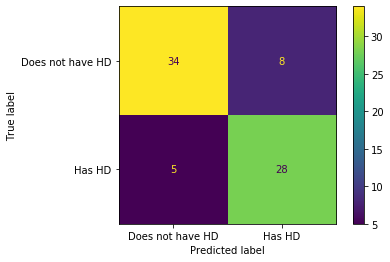

In [49]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=['Does not have HD', 'Has HD'])

As, We are seeing that the pruned tree is better at classifying patients than the full sized tree.

Of the 34+8=42 people that did not have heart disease, 34(81%) were correctly classified. This is an improvement over the full
sized tree, which only correctly classified 31(74%) of the patients without heart disease of the 5+28=33 people with heart disease
, 28(85%) were correctly classified. Again , this is an improvement over the full sized tree, which only correctly classified
26(79%) of the patients with heart disease.

The last thing we are going to do is draw the pruned tree and discuss to pruned it.

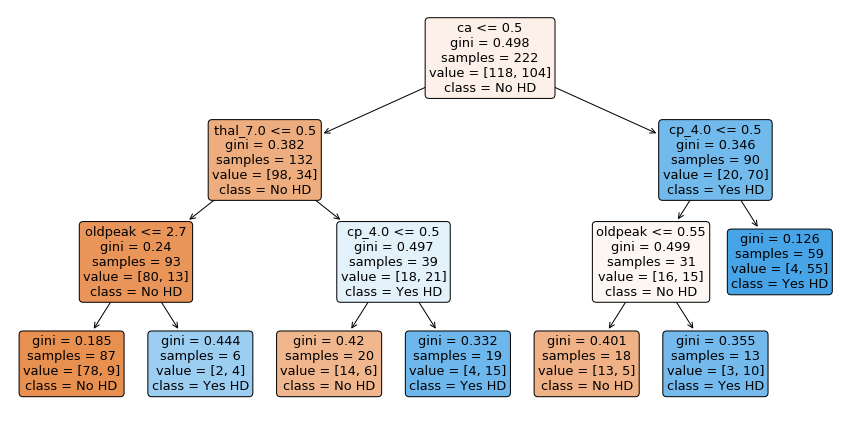

In [50]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned, filled=True, rounded=True, class_names=["No HD", "Yes HD"], feature_names=X_encoded.columns);





In [ ]:
Now lets discuss how to interpret the tree, in each node, we have:
    

    